In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k1 = 1.0
k2 = 0.5
k3 = 1.0

In [3]:
A0 = 1 # mol/L
B0 = 0 # mol/L
X0 = 1 # mol/L
Y0 = 1 # mol/L

In [4]:
T = 10
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [5]:
def dAdt(A, B, X, Y):
    return -k1*A*X

def dBdt(A, B, X, Y):
    return k3*Y

def dXdt(A, B, X, Y):
    return 2*k1*A*X - k1*A*X - k2*X*Y

def dYdt(A, B, X, Y):
    return -k2*X*Y + 2*k2*X*Y - k3*Y

In [6]:
# Estimate by Runge-Kutta Method
A_rk = np.zeros(len(t))
A_rk[0] = A0

B_rk = np.zeros(len(t))
B_rk[0] = B0

X_rk = np.zeros(len(t))
X_rk[0] = X0

Y_rk = np.zeros(len(t))
Y_rk[0] = Y0

for it in range(1, len(t)):    
    wk1 = dAdt(A_rk[it-1], B_rk[it-1], X_rk[it-1], Y_rk[it-1])
    xk1 = dBdt(A_rk[it-1], B_rk[it-1], X_rk[it-1], Y_rk[it-1])
    yk1 = dXdt(A_rk[it-1], B_rk[it-1], X_rk[it-1], Y_rk[it-1])
    zk1 = dYdt(A_rk[it-1], B_rk[it-1], X_rk[it-1], Y_rk[it-1])
    wk2 = dAdt(A_rk[it-1] + wk1 * dt/2, B_rk[it-1] + xk1 * dt/2, X_rk[it-1] + yk1 * dt/2, Y_rk[it-1] + zk1 * dt/2)
    xk2 = dBdt(A_rk[it-1] + wk1 * dt/2, B_rk[it-1] + xk1 * dt/2, X_rk[it-1] + yk1 * dt/2, Y_rk[it-1] + zk1 * dt/2)
    yk2 = dXdt(A_rk[it-1] + wk1 * dt/2, B_rk[it-1] + xk1 * dt/2, X_rk[it-1] + yk1 * dt/2, Y_rk[it-1] + zk1 * dt/2)
    zk2 = dYdt(A_rk[it-1] + wk1 * dt/2, B_rk[it-1] + xk1 * dt/2, X_rk[it-1] + yk1 * dt/2, Y_rk[it-1] + zk1 * dt/2)
    wk3 = dAdt(A_rk[it-1] + wk2 * dt/2, B_rk[it-1] + xk2 * dt/2, X_rk[it-1] + yk2 * dt/2, Y_rk[it-1] + zk2 * dt/2)
    xk3 = dBdt(A_rk[it-1] + wk2 * dt/2, B_rk[it-1] + xk2 * dt/2, X_rk[it-1] + yk2 * dt/2, Y_rk[it-1] + zk2 * dt/2)
    yk3 = dXdt(A_rk[it-1] + wk2 * dt/2, B_rk[it-1] + xk2 * dt/2, X_rk[it-1] + yk2 * dt/2, Y_rk[it-1] + zk2 * dt/2)
    zk3 = dYdt(A_rk[it-1] + wk2 * dt/2, B_rk[it-1] + xk2 * dt/2, X_rk[it-1] + yk2 * dt/2, Y_rk[it-1] + zk2 * dt/2)
    wk4 = dAdt(A_rk[it-1] + wk3 * dt, B_rk[it-1] + xk3 * dt, X_rk[it-1] + yk3 * dt, Y_rk[it-1] + zk3 * dt)
    xk4 = dBdt(A_rk[it-1] + wk3 * dt, B_rk[it-1] + xk3 * dt, X_rk[it-1] + yk3 * dt, Y_rk[it-1] + zk3 * dt)
    yk4 = dXdt(A_rk[it-1] + wk3 * dt, B_rk[it-1] + xk3 * dt, X_rk[it-1] + yk3 * dt, Y_rk[it-1] + zk3 * dt)
    zk4 = dYdt(A_rk[it-1] + wk3 * dt, B_rk[it-1] + xk3 * dt, X_rk[it-1] + yk3 * dt, Y_rk[it-1] + zk3 * dt)

    A_rk[it] = A_rk[it-1] + (1/6) * dt * (wk1 + 2*wk2 + 2*wk3 + wk4)
    B_rk[it] = B_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    X_rk[it] = X_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    Y_rk[it] = Y_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)

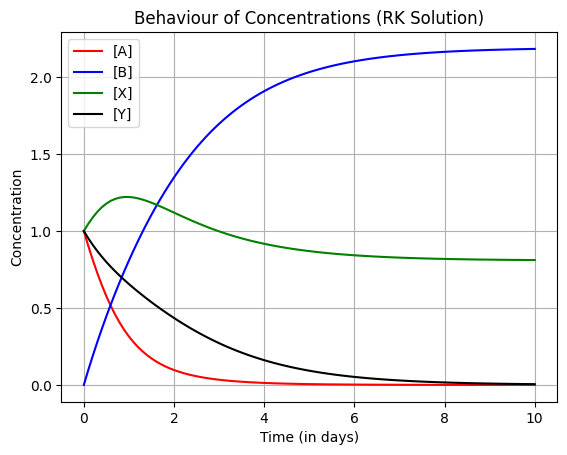

In [7]:
plt.plot(t, A_rk, label='[A]', color='red')
plt.plot(t, B_rk, label='[B]', color='blue')
plt.plot(t, X_rk, label='[X]', color='green')
plt.plot(t, Y_rk, label='[Y]', color='black')
plt.xlabel('Time (in days)')
plt.ylabel('Concentration')
plt.title('Behaviour of Concentrations (RK Solution)')
plt.legend()
plt.grid()

plt.show()